## EDA

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [115]:
df2015 = pd.read_csv('Data/TouristArrival2015.csv')
df2016 = pd.read_csv('Data/TouristArrival2016.csv')
df2017 = pd.read_csv('Data/TouristArrival2017.csv')
df2018 = pd.read_csv('Data/TouristArrival2018.csv')
df2019 = pd.read_csv('Data/TouristArrival2019.csv')
df2020 = pd.read_csv('Data/TouristArrival2020.csv')
df2021 = pd.read_csv('Data/TouristArrival2021.csv')
df2022 = pd.read_csv('Data/TouristArrival2022.csv')
dfAirPassenger = pd.read_csv('Data/thailand_air_passengers.csv')
dfDT = pd.read_csv('Data/thailand_domestic_tourism_2019_2023_ver2.csv')
dfDT

In [ ]:
df2018["year"] = 2018
df2019["year"] = 2019
df2020["year"] = 2020
df2017["year"] = 2017
df2016["year"] = 2016
df2015["year"] = 2015
df2021["year"] = 2021
df2022["year"] = 2022


print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2020.shape)
print(dfAirPassenger.shape)
print(dfDT.shape)
print(df2015.dtypes)
print(df2016.dtypes)
print(df2017.dtypes)
print(df2018.dtypes)
print(df2019.dtypes)
print(df2020.dtypes)
print(df2021.dtypes)
print(df2022.dtypes)
print(dfAirPassenger.dtypes)
print(dfDT.dtypes)
dfList = [df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]

(53, 9)
(53, 9)
(53, 9)
(53, 9)
(53, 9)
(26, 4)
(30800, 7)
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
year                               int64
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
year                               int64
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita 

In [ ]:
toChange = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']
for i, df in enumerate(dfList):
    for temp in toChange:
        try:
            df[temp] = df[temp].str.replace(",", "")
            df[temp] = pd.to_numeric(df[temp], errors="coerce")
        except:
            continue
    dfList[i] = df
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(total_missing)
    print('-----------------------------')

print(df2015.dtypes)
print(df2016.dtypes)
print(df2017.dtypes)
print(df2018.dtypes)
print(df2019.dtypes)
print(df2020.dtypes)
print(df2021.dtypes)
print(df2022.dtypes)
print(df2021)


0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
Country of Residence              object
No. of Arrivals                    int64
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)    float64
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)      float64
Tourism Receipts(Mil. $US)       float64
Region                            object
year                               int64
dtype: object
Country of Residence              object
No. of Arrivals                    int64
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)    float64
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)      float64
Tourism Receipts(Mil. $US)       float64
Region                            object
year                             

In [ ]:
for i, df in enumerate(dfList):
    df = df.drop('Per Capita Spending(Baht/Day)', axis=1)
    df = df.drop('Tourism Receipts(Mil. Baht)', axis=1)
    new_row = ['Other', df["No. of Arrivals"].sum(), df['Length of Stay(Days)'].mean(), df['Per Capita Spending($US/Day)'].mean()
               , df['Tourism Receipts(Mil. $US)'].sum(), 'Total', df['year'][1]]
    print(new_row)
        # new_row = {"Country of Residence": 'Other', 
        #        "No. of Arrivals": df["No. of Arrivals"].sum(), 
        #        'Length of Stay(Days)': df['Length of Stay(Days)'].mean(), 
        #        'Per Capita Spending(Baht/Day)': df['Per Capita Spending(Baht/Day)'].mean(), 
        #        'Per Capita Spending($US/Day)': df['Per Capita Spending($US/Day)'].mean(), 
        #        'Tourism Receipts(Mil. Baht)': df['Tourism Receipts(Mil. Baht)'].sum(), 
        #        'Tourism Receipts(Mil. $US)': df['Tourism Receipts(Mil. $US)'].sum(), 
        #        'Region': 'Total', 
        #        'year': df['year'][1]}
    df.loc[len(df.index)] = new_row
    dfList[i] = df
    # print(df)
# print(dfList[0])
dfNationality = pd.concat([dfList[0], dfList[1], dfList[2], dfList[3], dfList[4], dfList[5], dfList[6], dfList[7]], ignore_index=True)
# dfNationality2 = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022], ignore_index=True)
# dfDict['integrated']=dfNationality
numList = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending($US/Day)', 'Tourism Receipts(Mil. $US)']

# dfNationality
# dfNationality2

['Other', 21369792, 12.264716981132077, 146.5701886792453, 32664.619999999995, 'Total', 2015]
['Other', 32529588, 11.941320754716982, 148.78283018867924, 46274.72, 'Total', 2016]
['Other', 35591978, 12.191509433962263, 159.79698113207547, 53951.22999999999, 'Total', 2017]
['Other', 38178194, 11.969811320754715, 166.7988679245283, 58066.740000000005, 'Total', 2018]
['Other', 39916251, 11.920188679245282, 167.96679245283016, 61571.909999999996, 'Total', 2019]
['Other', 6725193, 14.442452830188682, 127.25811320754715, 11353.56, 'Total', 2020]
['Other', 510767, 44.457924528301895, 74.84396226415095, 3067.05, 'Total', 2021]
['Other', 11065226, 16.109622641509432, 101.4932075471698, 13736.439999999999, 'Total', 2022]


In [ ]:
import matplotlib.pyplot as plt

Regions = dfNationality['Region'].unique().tolist()
Countries = dfNationality['Country of Residence'].unique().tolist()
Years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
print(Regions)
print(Countries)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
# i=0
# for field in numList:
#     print(field)
#     # print(dfNationality2[field])
#     row = i // 3
#     col = i % 3
#     axes[row, col].boxplot(dfNationality[field])
#     axes[row, col].set_title(field)
#     i+=1
# plt.show()

['Asean', 'East Asia', 'Europe', 'The Americas', 'South Asia', 'Oceania', 'Middle East', 'Africa', 'Total']
['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Vietnam', 'China', 'Hong Kong', 'Japan', 'Korea', 'Taiwan', 'Others in East Asia', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Italy', 'Netherlands', 'Norway', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'East Europe', 'Others in Europe', 'Argentina', 'Brazil', 'Canada', 'USA', 'Others  in America', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka', 'Others in South Asia', 'Australia', 'New Zealand', 'Others  in Ociania', 'Egypt', 'Israel', 'Kuwait', 'Saudi Arabia', 'U.A.E.', 'Others in Middle East', 'South  Africa', 'Others in Africa', 'Other']


<Figure size 2520x1296 with 0 Axes>

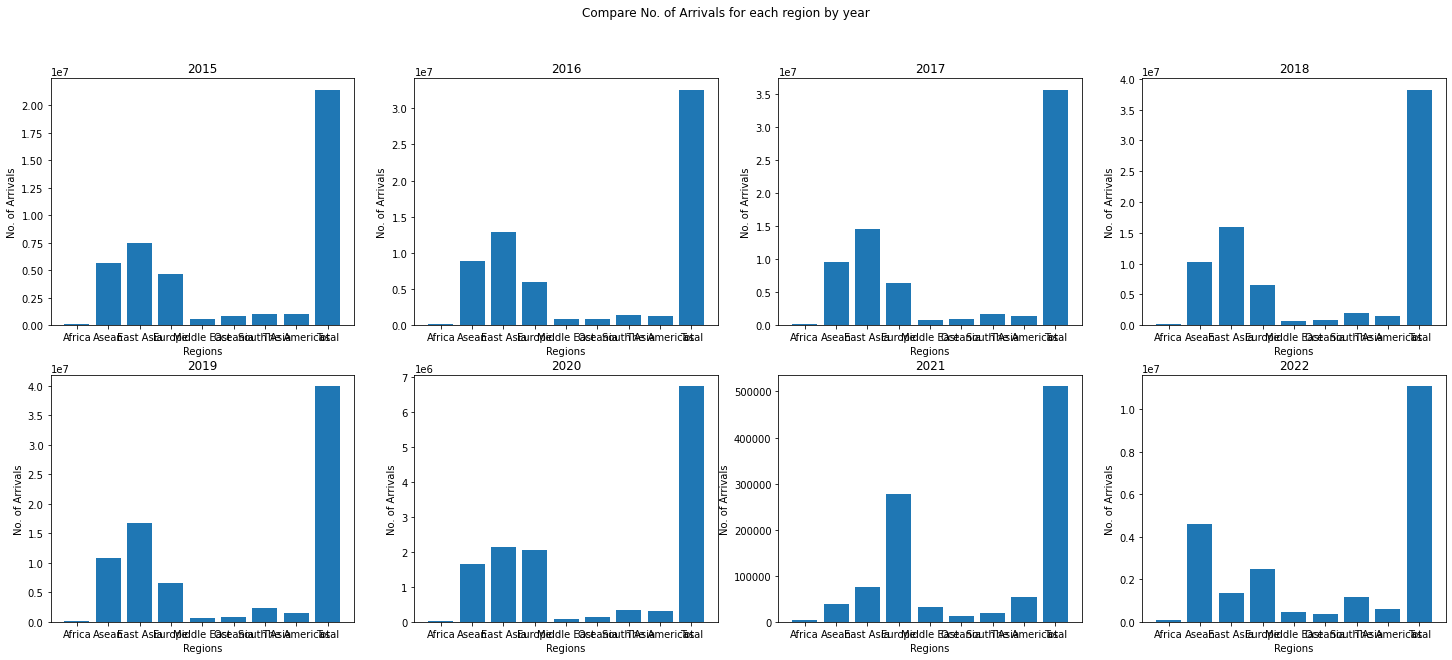

<Figure size 2160x1296 with 0 Axes>

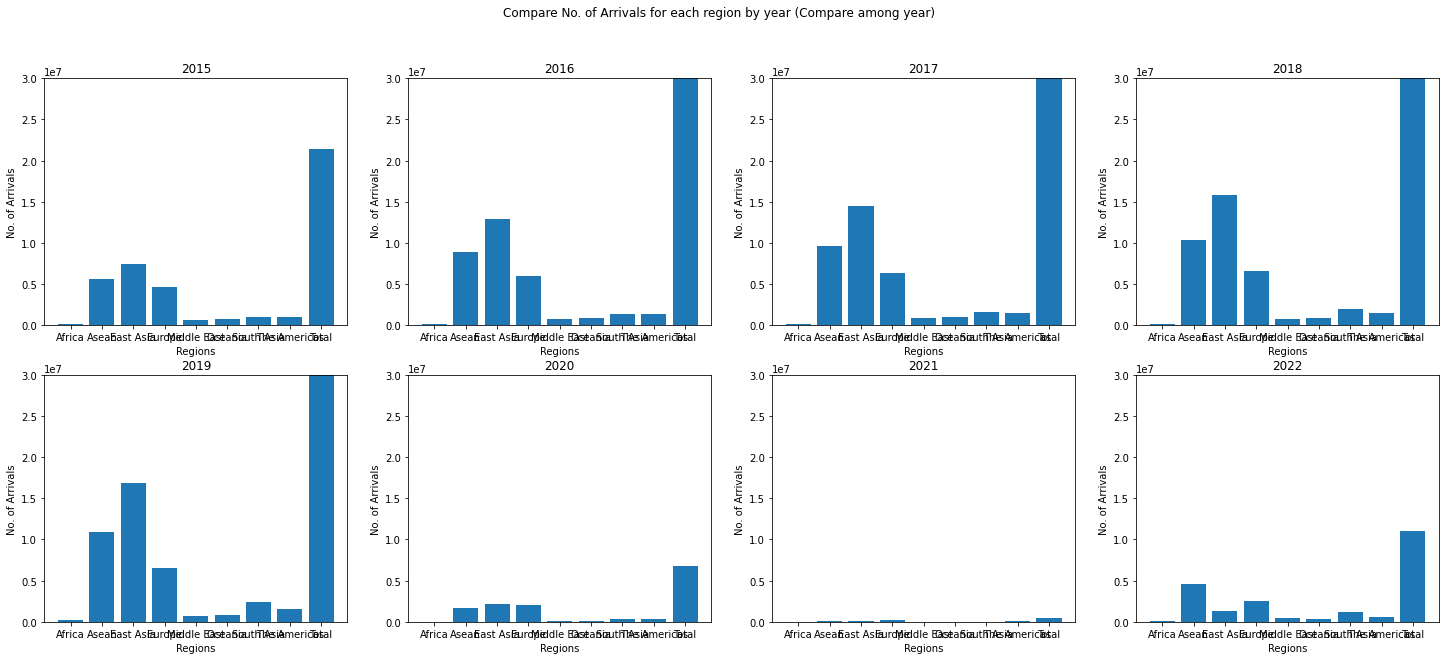

In [ ]:

plt.figure(figsize=(35, 18))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
i=0
year=2015
for df in dfList:
    row = i // 4
    col = i % 4
    region_totals = df.groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    i+=1
    year+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year')
plt.show()


plt.figure(figsize=(30, 18))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
i=0
year=2015
for df in dfList:
    row = i // 4
    col = i % 4
    region_totals = df.groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    axes[row, col].set_ylim(0, 30000000)
    i+=1
    year+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year (Compare among year)')
plt.show()

<Figure size 2520x1296 with 0 Axes>

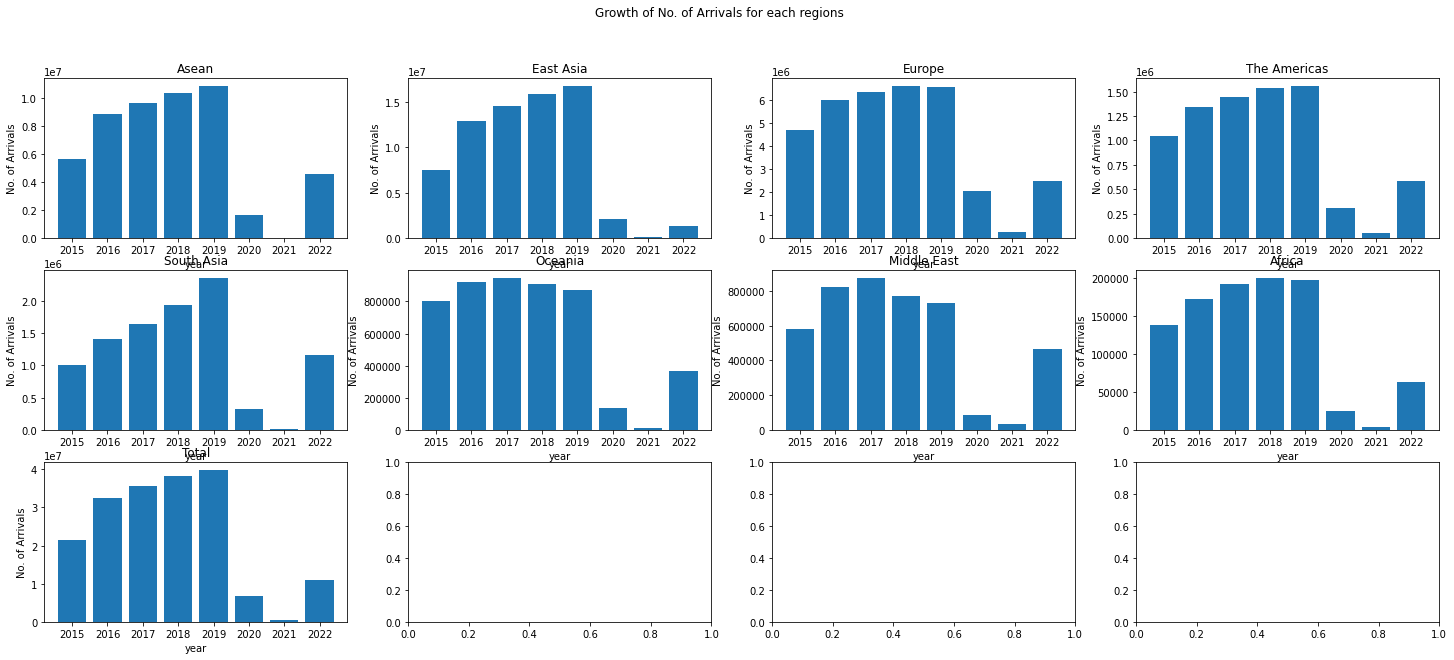

<Figure size 2520x1296 with 0 Axes>

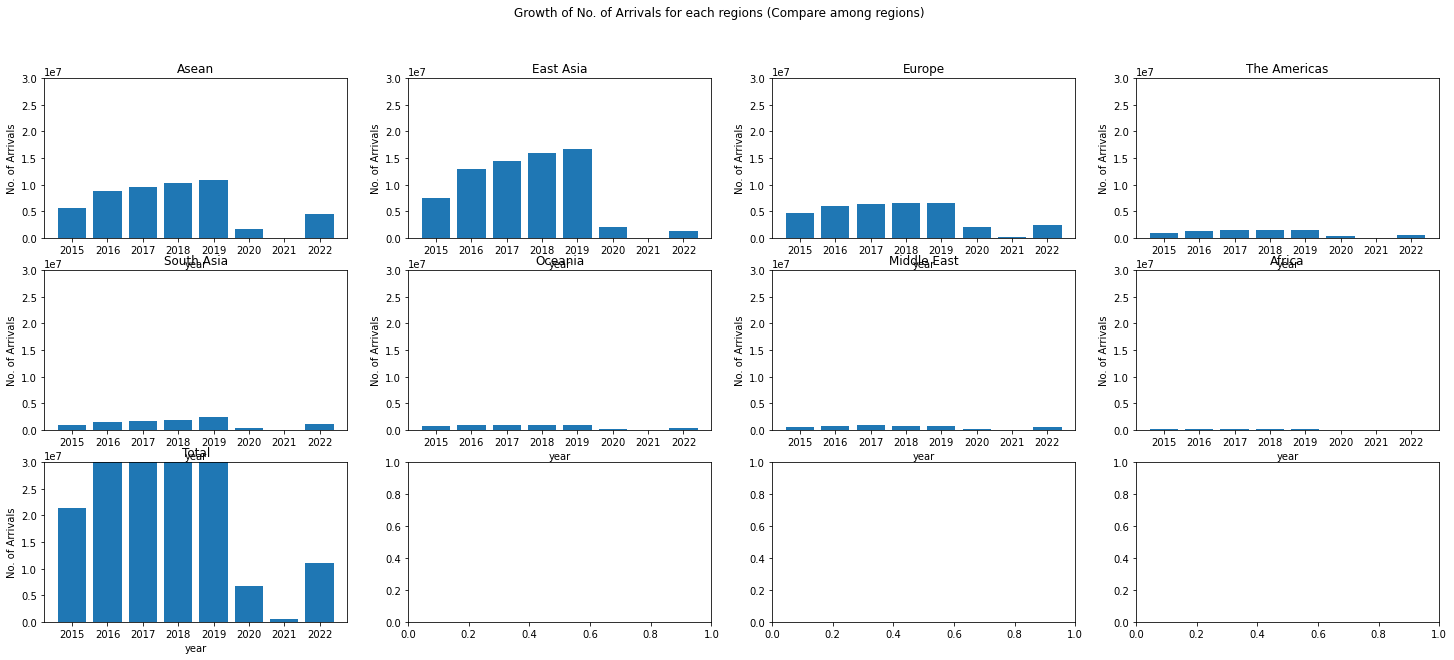

In [ ]:
plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))

i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    # axes[row, col].set_ylim(0, 30000000)
    i+=1
plt.suptitle('Growth of No. of Arrivals for each regions')
plt.show()


plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))
i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    axes[row, col].set_ylim(0, 30000000)
    i+=1

plt.suptitle('Growth of No. of Arrivals for each regions (Compare among regions)')
plt.show()

In [ ]:
NumToCountry = {}
CountryToNum = {}
NumToRegion = {}
RegionToNum = {}

for i, country in enumerate(Countries, start=1):
    NumToCountry[i] = country
    CountryToNum[country] = i

for i, region in enumerate(Regions, start=1):
    NumToCountry[i] = region
    RegionToNum[region] = i

def g(country):
    return CountryToNum.get(country, np.nan)

def h(region):
    return RegionToNum.get(region, np.nan)

dfNationality['Country of Residence'] = dfNationality['Country of Residence'].apply(g)
dfNationality['Region'] = dfNationality['Region'].apply(h)
print(dfNationality)


     Country of Residence  No. of Arrivals  Length of Stay(Days)  \
0                       1            15394              6.970000   
1                       2           519841              6.500000   
2                       3           320519              6.070000   
3                       4          1187321              5.830000   
4                       5          1653575              5.170000   
5                       6           234602              8.540000   
6                       7           240880              8.620000   
7                       8           924784              5.710000   
8                       9           534212              6.510000   
9                      10          4395183              9.370000   
10                     11           580046              6.630000   
11                     12          1140303              8.440000   
12                     13           854559              8.620000   
13                     14           457137      

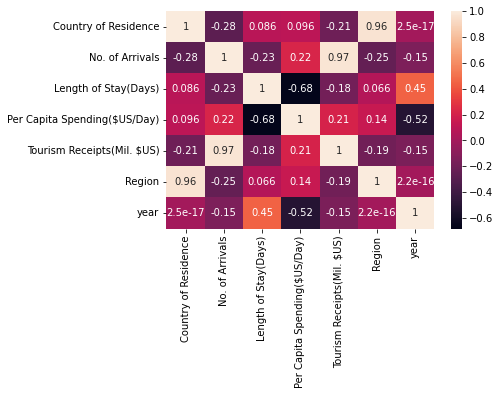

'\nyearly\n\n'

In [ ]:
import seaborn as sns


dfNationalityWithoutTotal = dfNationality[dfNationality['Region'] != 9]
sns.heatmap(dfNationalityWithoutTotal.corr(), annot=True)
plt.show()

"""
yearly

"""

## model(prepare)

In [ ]:
X = dfNationality[["Country of Residence", 'Length of Stay(Days)', 'Per Capita Spending($US/Day)',
                   'Tourism Receipts(Mil. $US)', 'Region', 'year']]
y = dfNationality["No. of Arrivals"]
country = CountryToNum["Japan"]
length_of_stay = 7
per_capita_spending_usd = 100
tourism_receipts_usd = 200000
region = RegionToNum["East Asia"]
year = 2023
predVal = [country, length_of_stay, per_capita_spending_usd,
            tourism_receipts_usd, region, year]
pd.set_option('display.max_rows', None)
print(X)

     Country of Residence  Length of Stay(Days)  Per Capita Spending($US/Day)  \
0                       1              6.970000                    169.720000   
1                       2              6.500000                    132.740000   
2                       3              6.070000                    149.460000   
3                       4              5.830000                    123.880000   
4                       5              5.170000                    152.340000   
5                       6              8.540000                    145.800000   
6                       7              8.620000                    143.190000   
7                       8              5.710000                    180.350000   
8                       9              6.510000                    153.350000   
9                      10              9.370000                    164.710000   
10                     11              6.630000                    180.290000   
11                     12   

In [ ]:
n_list = []
for i in range(1, 11):
    n_list.append(3 + 30*i)

testDf = dfNationalityWithoutTotal.iloc[n_list]
testDf

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending($US/Day),Tourism Receipts(Mil. $US),Region,year
33,34,185736,18.27,130.14,441.62,4,2015
64,11,732417,6.31,182.06,841.40,2,2016
94,41,67876,7.14,167.98,81.41,5,2016
125,18,157923,16.45,155.33,403.51,3,2017
155,48,80895,13.88,219.54,246.50,7,2017
186,25,1466457,16.92,131.01,3250.64,3,2018
217,2,925437,7.39,184.97,1264.99,1,2019
247,32,28183,14.07,146.13,57.94,4,2019
278,9,131308,11.53,119.24,206.67,1,2020
308,39,10396,11.61,137.45,18.08,5,2020


In [ ]:
testVals = []
testAns = []
# print(dfNationality[0])
for row in testDf.iterrows():

    country = row[1][0]
    length_of_stay = row[1][2]
    per_capita_spending_usd = row[1][3]
    tourism_receipts_usd = row[1][4]
    region = row[1][5]
    year = row[1][6]
    testVal = [country, length_of_stay, per_capita_spending_usd,
                        tourism_receipts_usd, region, year]
    testVals.append(testVal)
    testAns.append(row[1][1])

testVals

[[34.0, 18.27, 5000, 130.14, 1000000, 441.62, 4.0, 2015.0],
 [11.0, 6.31, 5000, 182.06, 1000000, 841.4, 2.0, 2016.0],
 [41.0, 7.14, 5000, 167.98, 1000000, 81.41, 5.0, 2016.0],
 [18.0, 16.45, 5000, 155.33, 1000000, 403.51, 3.0, 2017.0],
 [48.0, 13.88, 5000, 219.54, 1000000, 246.5, 7.0, 2017.0],
 [25.0, 16.92, 5000, 131.01, 1000000, 3250.64, 3.0, 2018.0],
 [2.0, 7.39, 5000, 184.97, 1000000, 1264.99, 1.0, 2019.0],
 [32.0, 14.07, 5000, 146.13, 1000000, 57.94, 4.0, 2019.0],
 [9.0, 11.53, 5000, 119.24, 1000000, 206.67, 1.0, 2020.0],
 [39.0, 11.61, 5000, 137.45, 1000000, 18.08, 5.0, 2020.0]]

## model(Regression)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Linear Regression
LRModel = LinearRegression()
LRModel.fit(X, y)
x_pred = np.array([predVal])


LR_pred = LRModel.predict(x_pred)
print(LR_pred)

[1.32694258e+08]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(1, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best degree:", grid_search.best_params_['poly_features__degree'])

Best degree: 1


In [ ]:
poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])

X_poly = poly.fit_transform(X)

PRModel = LinearRegression()
PRModel.fit(X_poly, y)

x_pred = poly.fit_transform(x_pred)

PR_pred = PRModel.predict(x_pred)
print(PR_pred)

[1.32694258e+08]


In [ ]:
#test Linear Socre
testPred = []
for testVal in testVals:
    x_pred = np.array([testVal])
    testPred.append(LRModel.predict(x_pred))

mse = mean_squared_error(testAns, testPred)
r2 = r2_score(testAns, testPred)
# print(testAns)
# print(testPred)
# print(testVals)
# testDf
print(mse)
print(r2)

ValueError: X has 8 features, but LinearRegression is expecting 6 features as input.

In [ ]:
#test Polynomial Socre
testPred = []
for testVal in testVals:
    x_pred = np.array([testVal])
    x_pred = poly.fit_transform(x_pred)
    testPred.append(PRModel.predict(x_pred))

mse = mean_squared_error(testAns, testPred)
r2 = r2_score(testAns, testPred)
# print(testAns)
# print(testPred)
# print(testVals)
# testDf
print(mse)
print(r2)

51112851185.57263
0.4965564523906675
